In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import time
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
import csv
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [7]:
#打开数据文件
d33=pd.read_csv('E:/yadian.csv')  #读取数据集
#遍历 格式设置为float
traffic_feature=d33[['取向因子y','取向因子x','PZT体积分数','通道因子z','界面平行因子']]
traffic_target=d33['d33']
scaler = StandardScaler() # 标准化转换
scaler.fit(traffic_feature)  # 训练标准化对象
traffic_feature= scaler.transform(traffic_feature)   # 转换数据集
print(traffic_feature)

[[ 1.52728857  1.52765188  2.18198844  2.65384559  2.55356395]
 [-1.09363993 -0.58818918  2.09188152  0.84227485  1.0756123 ]
 [ 1.52049688  1.4866115   2.04414041  2.49837127  2.3583453 ]
 ...
 [-1.19979508 -0.4990407  -1.6986918  -1.86294753 -1.81107767]
 [ 2.14063439  1.88144472 -1.69989417 -1.57590904 -1.57902765]
 [-0.58079727 -0.49768354 -1.71007893 -1.75187541 -1.81521811]]


0.9305453244903825
0.9305453244903825


D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-

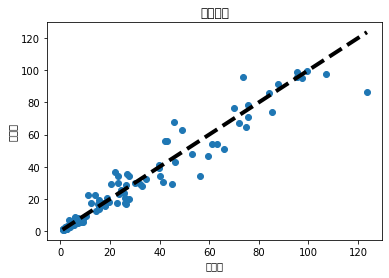

In [8]:
feature_train,feature_test,target_train, target_test = train_test_split(traffic_feature,traffic_target,test_size=0.2,random_state=201)
candidate=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30,80, 100,110,130,150]
candidate = np.logspace(-10, 2, 50)
combination=[(C, gamma) for C in candidate for gamma in candidate]
if __name__=="__main__":
    parameters={'C': candidate, 'gamma': candidate}
    svr=SVR()
    clf=GridSearchCV(svr, parameters, n_jobs=-1)
    clf.fit(feature_train,target_train)
    predict_results1=clf.predict(feature_test)
r_squared = r2_score(target_test,predict_results1 )
print(r_squared)
print(clf.score(feature_test, target_test))
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.title("拟合结果")
plt.scatter(target_test, predict_results1)
plt.plot([target_test.min(),target_test.max()],[target_test.min(),target_test.max()],'k--',lw=4,label='predicted')